In [ ]:
# https://stackoverflow.com/questions/7110899/how-do-i-apply-a-dct-to-an-image-in-python
# https://hicraigchen.medium.com/digital-image-processing-using-fourier-transform-in-python-bcb49424fd82

In [2]:
# !wget https://www.cosy.sbg.ac.at/~pmeerw/Watermarking/lena_color.gif

--2021-08-03 15:50:50--  https://www.cosy.sbg.ac.at/~pmeerw/Watermarking/lena_color.gif
Resolving www.cosy.sbg.ac.at (www.cosy.sbg.ac.at)... 141.201.2.14
접속 www.cosy.sbg.ac.at (www.cosy.sbg.ac.at)|141.201.2.14|:443... 접속됨.
HTTP request sent, awaiting response... 200 OK
Length: 227335 (222K) [image/gif]
Saving to: ‘lena_color.gif’

lena_color.gif      100%[===================>] 222.01K   208KB/s    in 1.1s    

2021-08-03 15:50:52 (208 KB/s) - ‘lena_color.gif’ saved [227335/227335]



In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
import scipy as sp
import os

from skimage import img_as_float
from skimage.morphology import reconstruction, h_maxima, h_minima
from skimage import morphology

import torch
import torch.nn.functional as F

In [1]:
from scipy.fftpack import dct, idct
from skimage.io import imread
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pylab as plt

In [19]:
# implement 2D DCT
def dct2(a):
    return dct(dct(a.T, norm='ortho').T, norm='ortho')

# implement 2D IDCT
def idct2(a):
    return idct(idct(a.T, norm='ortho').T, norm='ortho')    

/home/beomgon/anaconda3/envs/pytorch_retina/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  after removing the cwd from sys.path.


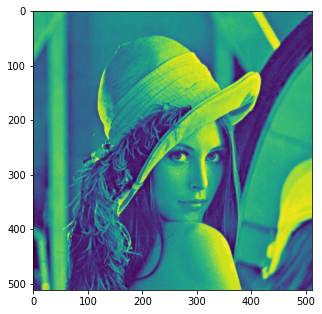

In [26]:
img = imread('../lena_color.jpg')
type(img)
img.shape
gray_img = rgb2gray(imread('../lena_color.jpg'))
gray_img.shape

plt.figure(figsize=(5, 10))
plt.imshow(gray_img);

In [17]:
# dct_img = dct(gray_img)
# plt.figure(figsize=(5, 10))
# plt.imshow(dct_img);

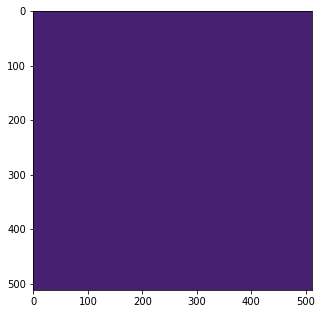

In [27]:
imF = dct2(gray_img)
plt.figure(figsize=(5, 10))
plt.imshow(imF);

In [23]:
imF[:5,:5]

array([[227.1467375 , -22.03842712,  -4.94371845,  19.7026006 ,
         16.83990209],
       [ 13.79333942,  15.03154217, -13.99894553,  -4.5778329 ,
         -3.48486066],
       [ -1.22896771,   6.9548709 , -11.70841953,  16.59443251,
        -11.61123517],
       [ -3.70822942,  -3.26868711,  16.47691338, -12.17800218,
          2.25900368],
       [ -5.66543534,   4.53976144,   4.50402009,   4.62099731,
         -0.72876524]])

In [ ]:
# read lena RGB image and convert to grayscale
im = rgb2gray(imread('../lena_color.jpg')) 
imF = dct2(im)
im1 = idct2(imF)

# check if the reconstructed image is nearly equal to the original image
np.allclose(im, im1)
# True

# plot original and reconstructed images with matplotlib.pylab
plt.gray()
plt.subplot(121), plt.imshow(im), plt.axis('off'), plt.title('original image', size=20)
plt.subplot(122), plt.imshow(im1), plt.axis('off'), plt.title('reconstructed image (DCT+IDCT)', size=20)
plt.show()

/home/beomgon/anaconda3/envs/pytorch_retina/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


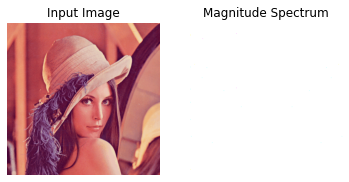

In [25]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = imread('../lena_color.jpg')
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121), plt.imshow(img,cmap='gray')
plt.title("Input Image"), plt.axis('off')
plt.subplot(122), plt.imshow(magnitude_spectrum,cmap='gray')
plt.title("Magnitude Spectrum"), plt.axis('off')
plt.show()

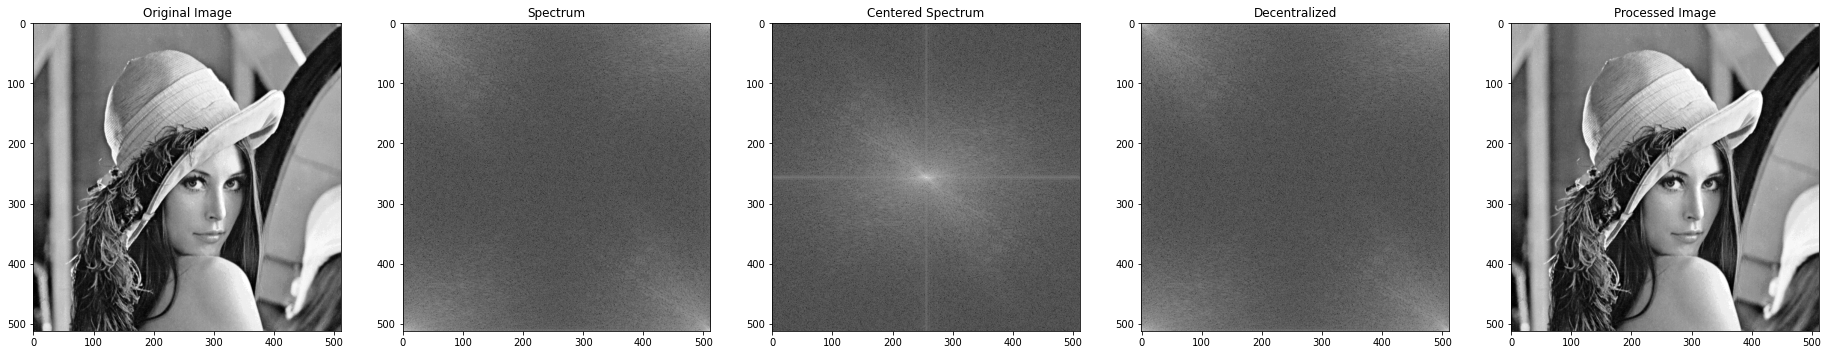

In [29]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img = imread('../lena_color.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img_c2 = np.fft.fft2(img)
img_c3 = np.fft.fftshift(img_c2)
img_c4 = np.fft.ifftshift(img_c3)
img_c5 = np.fft.ifft2(img_c4)

plt.subplot(151), plt.imshow(img, "gray"), plt.title("Original Image")
plt.subplot(152), plt.imshow(np.log(1+np.abs(img_c2)), "gray"), plt.title("Spectrum")
plt.subplot(153), plt.imshow(np.log(1+np.abs(img_c3)), "gray"), plt.title("Centered Spectrum")
plt.subplot(154), plt.imshow(np.log(1+np.abs(img_c4)), "gray"), plt.title("Decentralized")
plt.subplot(155), plt.imshow(np.abs(img_c5), "gray"), plt.title("Processed Image")

plt.show()

In [32]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt,exp

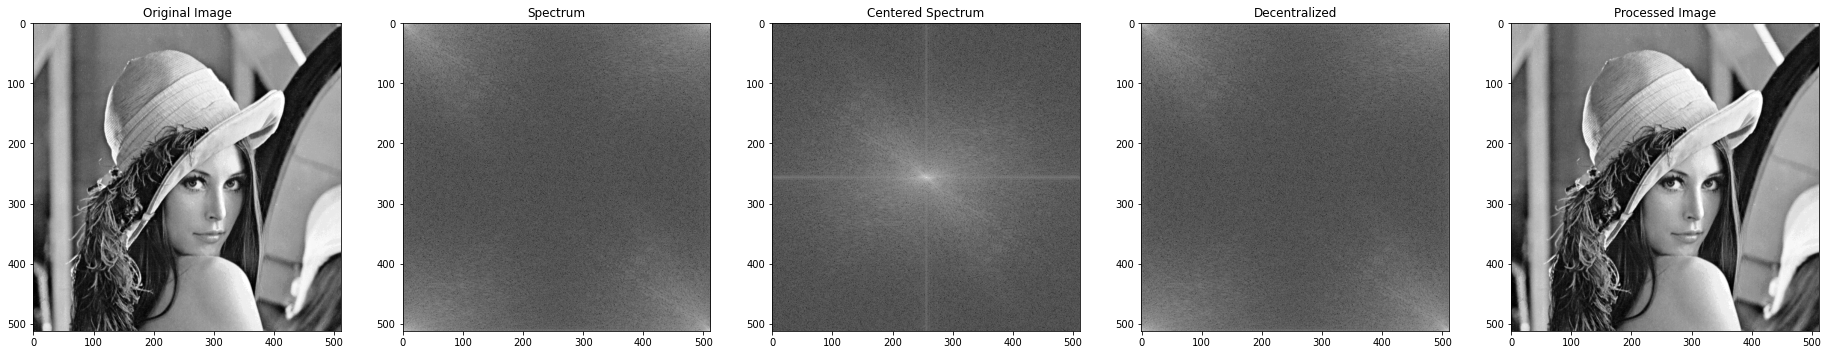

In [33]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img = imread('../lena_color.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.subplot(151), plt.imshow(img, "gray"), plt.title("Original Image")

original = np.fft.fft2(img)
plt.subplot(152), plt.imshow(np.log(1+np.abs(original)), "gray"), plt.title("Spectrum")

center = np.fft.fftshift(original)
plt.subplot(153), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Centered Spectrum")

inv_center = np.fft.ifftshift(center)
plt.subplot(154), plt.imshow(np.log(1+np.abs(inv_center)), "gray"), plt.title("Decentralized")

processed_img = np.fft.ifft2(inv_center)
plt.subplot(155), plt.imshow(np.abs(processed_img), "gray"), plt.title("Processed Image")

plt.show()

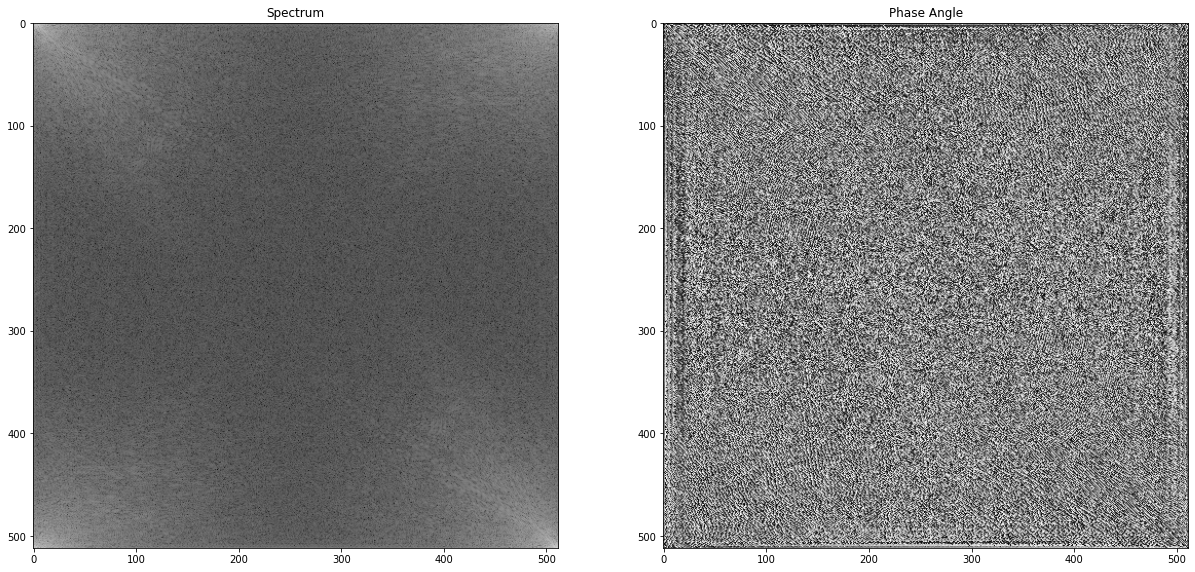

In [34]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img = imread('../lena_color.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

original = np.fft.fft2(img)
plt.subplot(131), plt.imshow(np.log(np.abs(original)), "gray"), plt.title("Spectrum")

plt.subplot(132), plt.imshow(np.angle(original), "gray"), plt.title("Phase Angle")
plt.show()

In [35]:
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def idealFilterLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base

def idealFilterHP(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base

def butterworthLP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def butterworthHP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1-1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

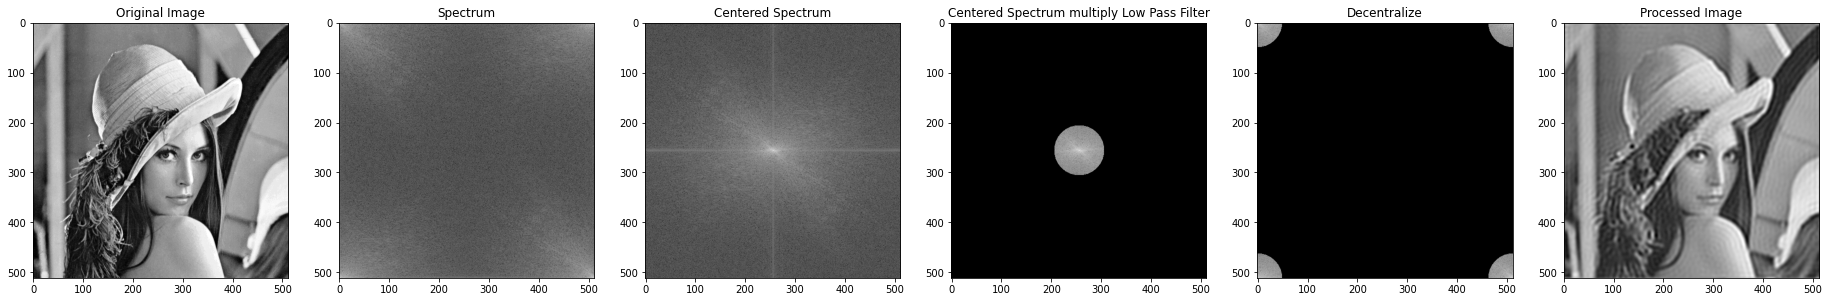

In [36]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img = imread('../lena_color.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.subplot(161), plt.imshow(img, "gray"), plt.title("Original Image")

original = np.fft.fft2(img)
plt.subplot(162), plt.imshow(np.log(1+np.abs(original)), "gray"), plt.title("Spectrum")

center = np.fft.fftshift(original)
plt.subplot(163), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Centered Spectrum")

LowPassCenter = center * idealFilterLP(50,img.shape)
plt.subplot(164), plt.imshow(np.log(1+np.abs(LowPassCenter)), "gray"), plt.title("Centered Spectrum multiply Low Pass Filter")

LowPass = np.fft.ifftshift(LowPassCenter)
plt.subplot(165), plt.imshow(np.log(1+np.abs(LowPass)), "gray"), plt.title("Decentralize")

inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(166), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Processed Image")

plt.show()

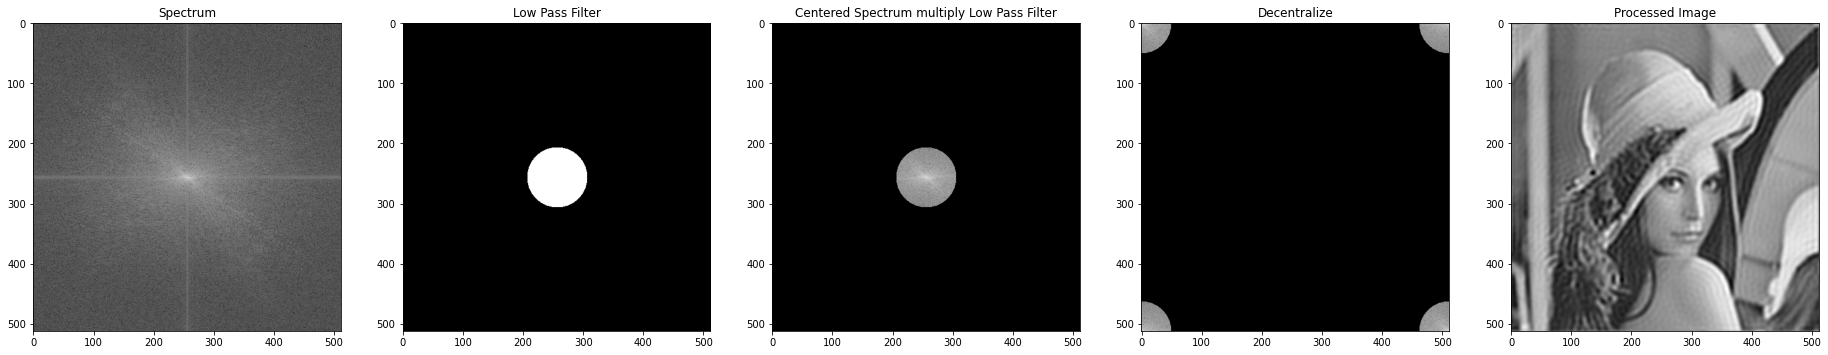

In [37]:
img = imread('../lena_color.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(151), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Spectrum")

LowPass = idealFilterLP(50,img.shape)
plt.subplot(152), plt.imshow(np.abs(LowPass), "gray"), plt.title("Low Pass Filter")

LowPassCenter = center * idealFilterLP(50,img.shape)
plt.subplot(153), plt.imshow(np.log(1+np.abs(LowPassCenter)), "gray"), plt.title("Centered Spectrum multiply Low Pass Filter")

LowPass = np.fft.ifftshift(LowPassCenter)
plt.subplot(154), plt.imshow(np.log(1+np.abs(LowPass)), "gray"), plt.title("Decentralize")

inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(155), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Processed Image")

plt.show()

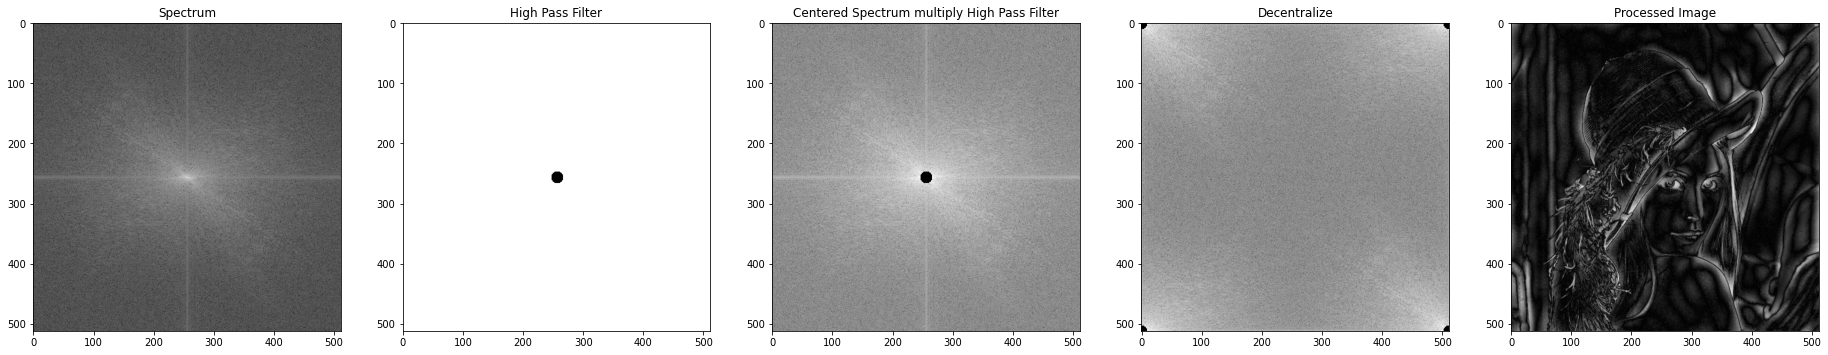

In [43]:
img = imread('../lena_color.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(151), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Spectrum")

HighPass = idealFilterHP(10,img.shape)
plt.subplot(152), plt.imshow(np.abs(HighPass), "gray"), plt.title("High Pass Filter")

HighPassCenter = center * idealFilterHP(10,img.shape)
plt.subplot(153), plt.imshow(np.log(1+np.abs(HighPassCenter)), "gray"), plt.title("Centered Spectrum multiply High Pass Filter")

HighPass = np.fft.ifftshift(HighPassCenter)
plt.subplot(154), plt.imshow(np.log(1+np.abs(HighPass)), "gray"), plt.title("Decentralize")

inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(155), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Processed Image")

plt.show()

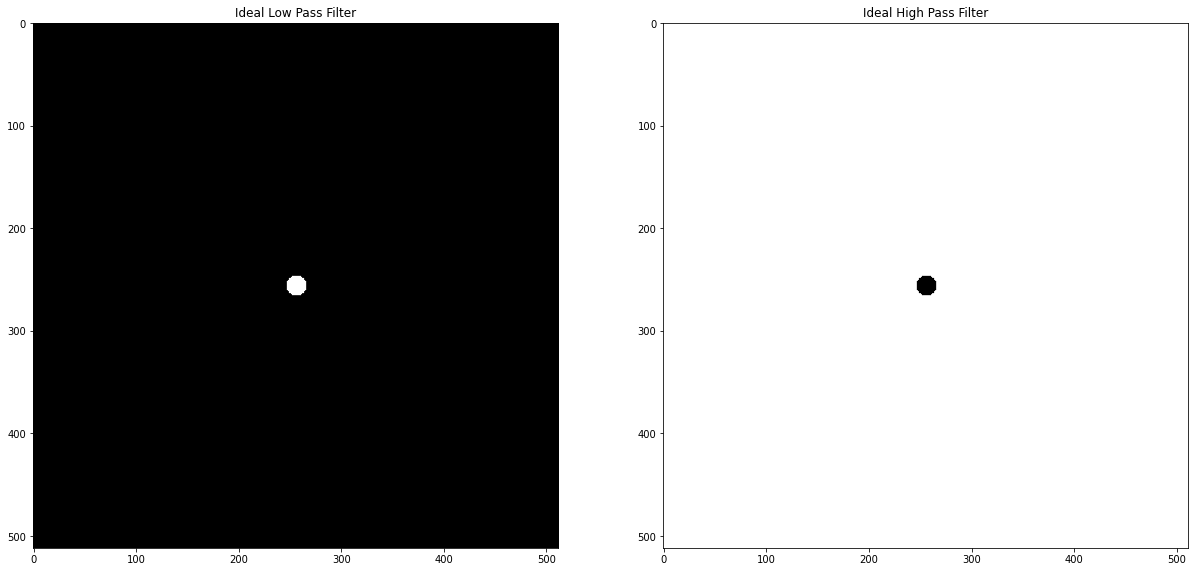

In [41]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPass = idealFilterLP(10,img.shape)
plt.subplot(131), plt.imshow(LowPass, "gray"), plt.title("Ideal Low Pass Filter")

HighPass = idealFilterHP(10,img.shape)
plt.subplot(132), plt.imshow(HighPass, "gray"), plt.title("Ideal High Pass Filter")

plt.show()

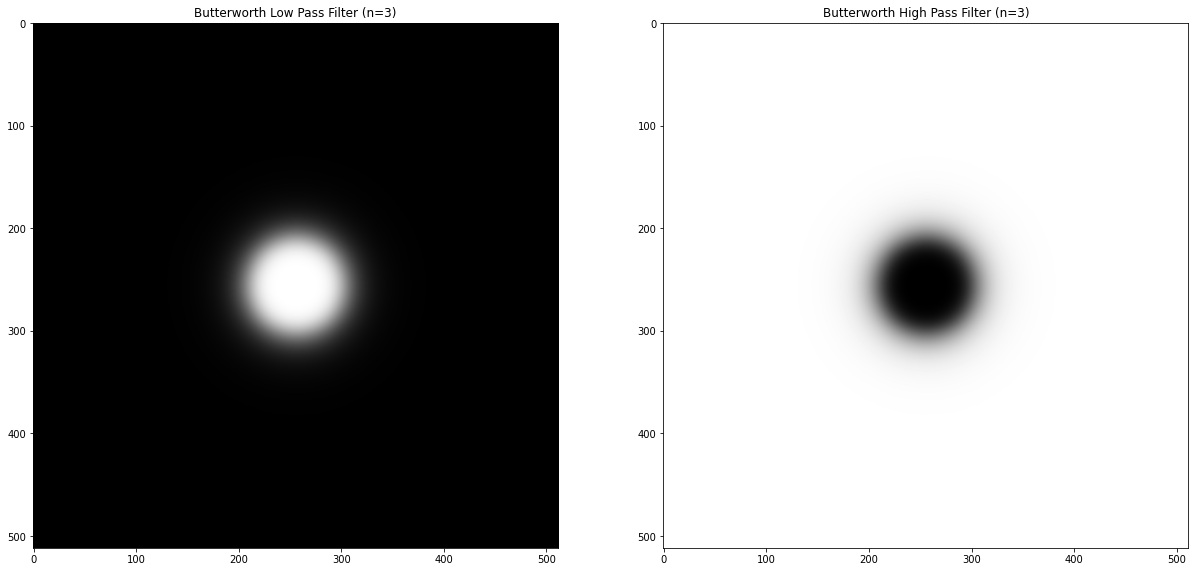

In [44]:

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPass = butterworthLP(50,img.shape,3)
plt.subplot(131), plt.imshow(LowPass, "gray"), plt.title("Butterworth Low Pass Filter (n=3)")

HighPass = butterworthHP(50,img.shape,3)
plt.subplot(132), plt.imshow(HighPass, "gray"), plt.title("Butterworth High Pass Filter (n=3)")

plt.show()

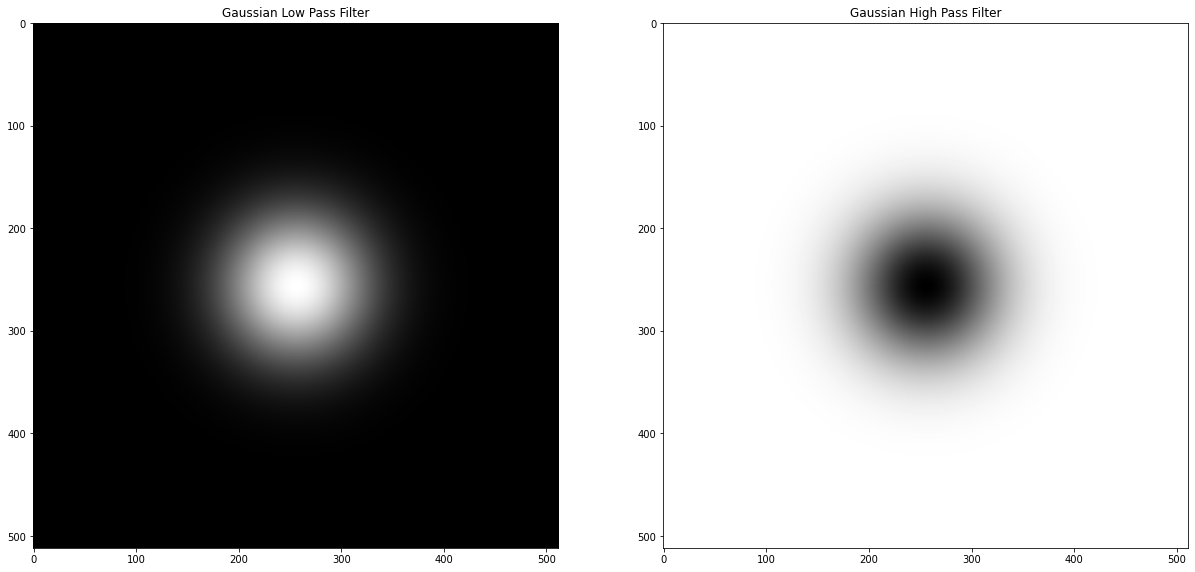

In [45]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPass = gaussianLP(50,img.shape)
plt.subplot(131), plt.imshow(LowPass, "gray"), plt.title("Gaussian Low Pass Filter")

HighPass = gaussianHP(50,img.shape)
plt.subplot(132), plt.imshow(HighPass, "gray"), plt.title("Gaussian High Pass Filter")

plt.show()

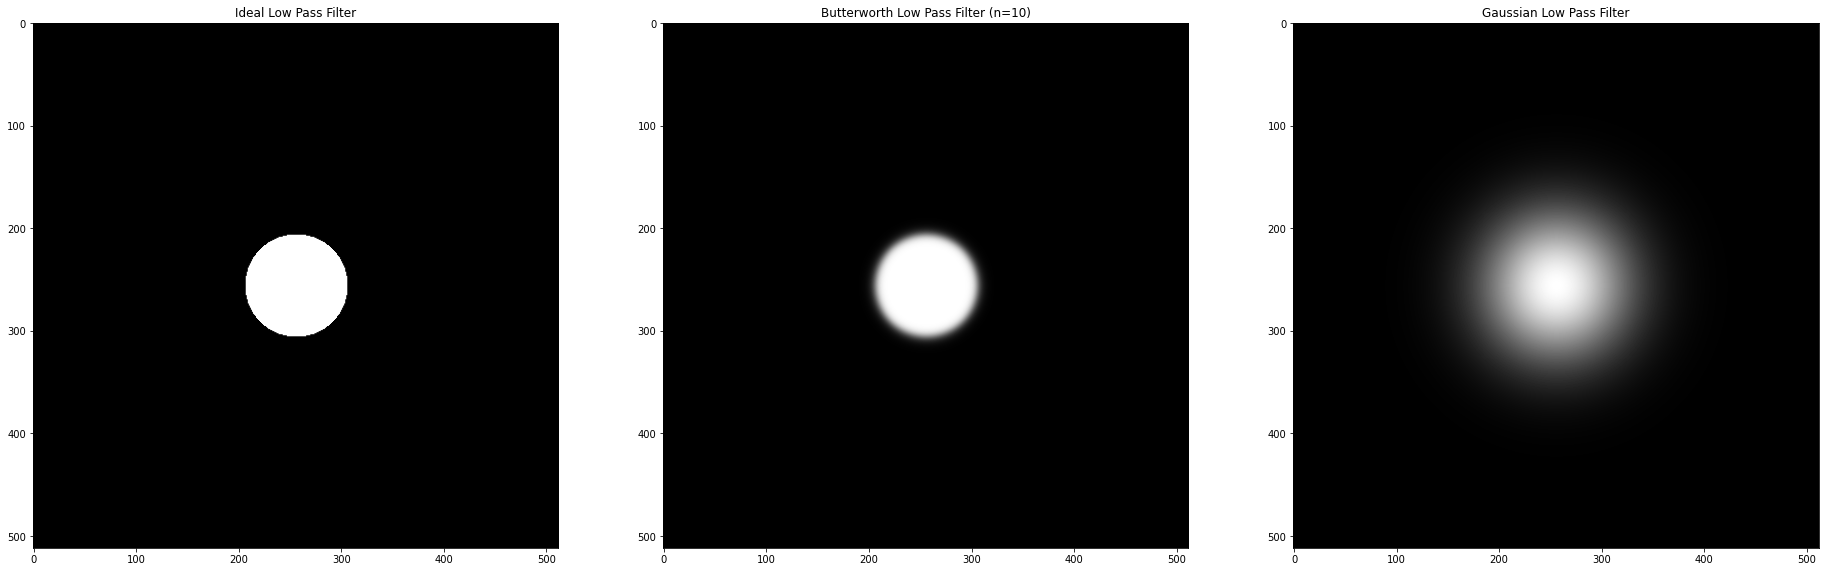

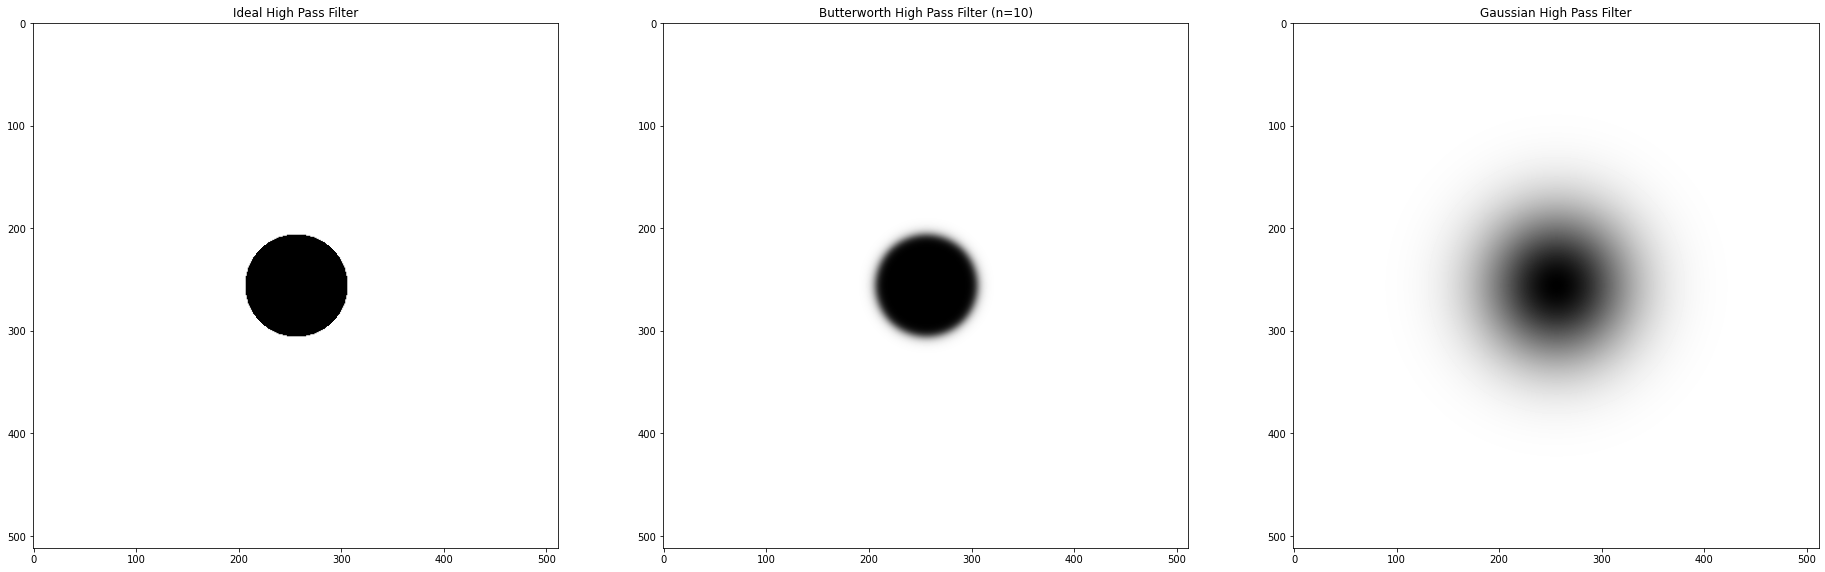

In [46]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

IdealLP = idealFilterLP(50,img.shape)
plt.subplot(131), plt.imshow(IdealLP, "gray"), plt.title("Ideal Low Pass Filter")

ButterLP = butterworthLP(50,img.shape,10)
plt.subplot(132), plt.imshow(ButterLP, "gray"), plt.title("Butterworth Low Pass Filter (n=10)")

GaussianLP = gaussianLP(50,img.shape)
plt.subplot(133), plt.imshow(GaussianLP, "gray"), plt.title("Gaussian Low Pass Filter")

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
IdealHP = idealFilterHP(50,img.shape)
plt.subplot(231), plt.imshow(IdealHP, "gray"), plt.title("Ideal High Pass Filter")

ButterHP = butterworthHP(50,img.shape,10)
plt.subplot(232), plt.imshow(ButterHP, "gray"), plt.title("Butterworth High Pass Filter (n=10)")

GaussianHP = gaussianHP(50,img.shape)
plt.subplot(233), plt.imshow(GaussianHP, "gray"), plt.title("Gaussian High Pass Filter")

plt.show()

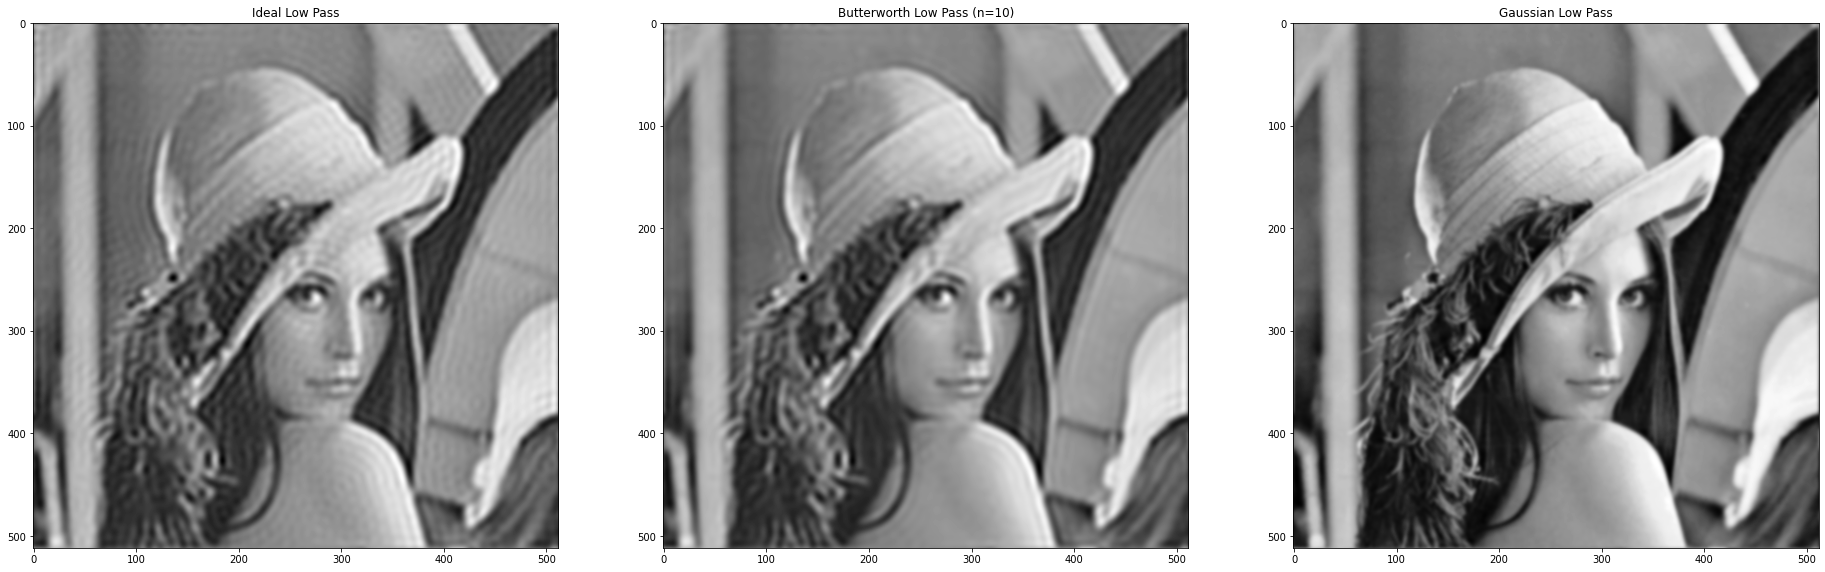

In [47]:
img = imread('../lena_color.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPassCenter = center * idealFilterLP(50,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(131), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Ideal Low Pass")

LowPassCenter = center * butterworthLP(50,img.shape,10)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(132), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Butterworth Low Pass (n=10)")

LowPassCenter = center * gaussianLP(50,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(133), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Gaussian Low Pass")

plt.show()

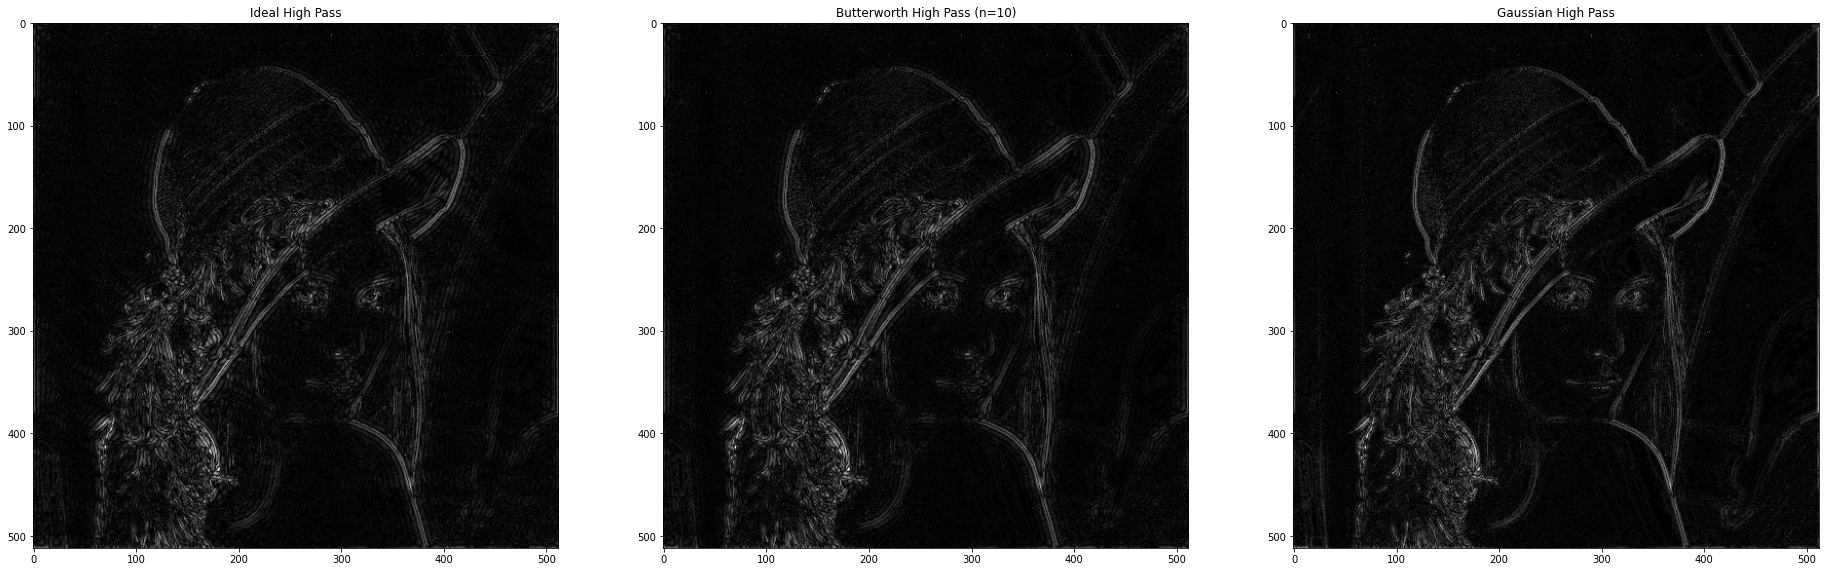

In [48]:
img = imread('../lena_color.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

HighPassCenter = center * idealFilterHP(50,img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(131), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Ideal High Pass")

HighPassCenter = center * butterworthHP(50,img.shape,10)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(132), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Butterworth High Pass (n=10)")

HighPassCenter = center * gaussianHP(50,img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(133), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Gaussian High Pass")

plt.show()

In [ ]:
img = imread('../lena_color.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(131), plt.imshow(img, "gray"), plt.title("Original Image")

LowPassCenter = center * gaussianLP(50,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(132), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Gaussian Low Pass")

HighPassCenter = center * gaussianHP(50,img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(133), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Gaussian High Pass")

plt.show()